# STEP #0: PROBLEM STATEMENT  

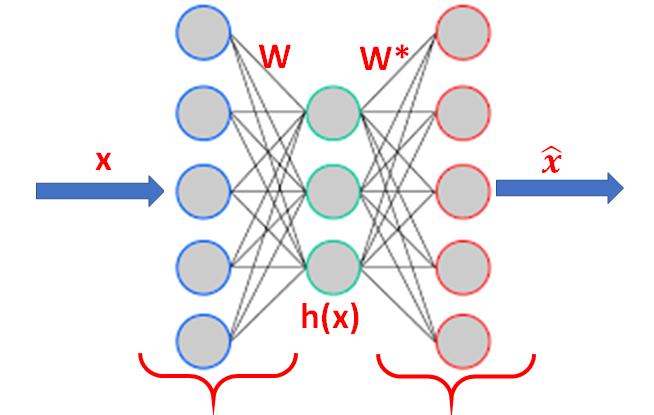


- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
- Auto encoders use the same input data for the input and output, Sounds crazy right!?
- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent) 


# STEP #1: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.9.2
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.7 MB/s eta 0:00:00


# STEP #2: LOAD DATASET

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [4]:
with open('train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [8]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

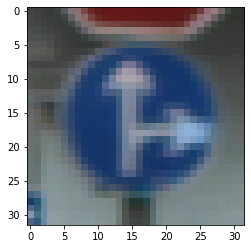

In [9]:
plt.imshow(X_train[1100])

# STEP #3: DATA VISUALIZATION

In [10]:
X_train.shape

(34799, 32, 32, 3)

In [11]:
X_test.shape

(12630, 32, 32, 3)

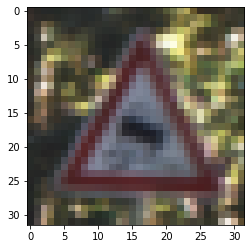

In [12]:
i = random.randint(1,34000) 

plt.imshow( X_train[i], cmap='gray') # reshape and plot the image

In [13]:
label = y_train[i]
label

23

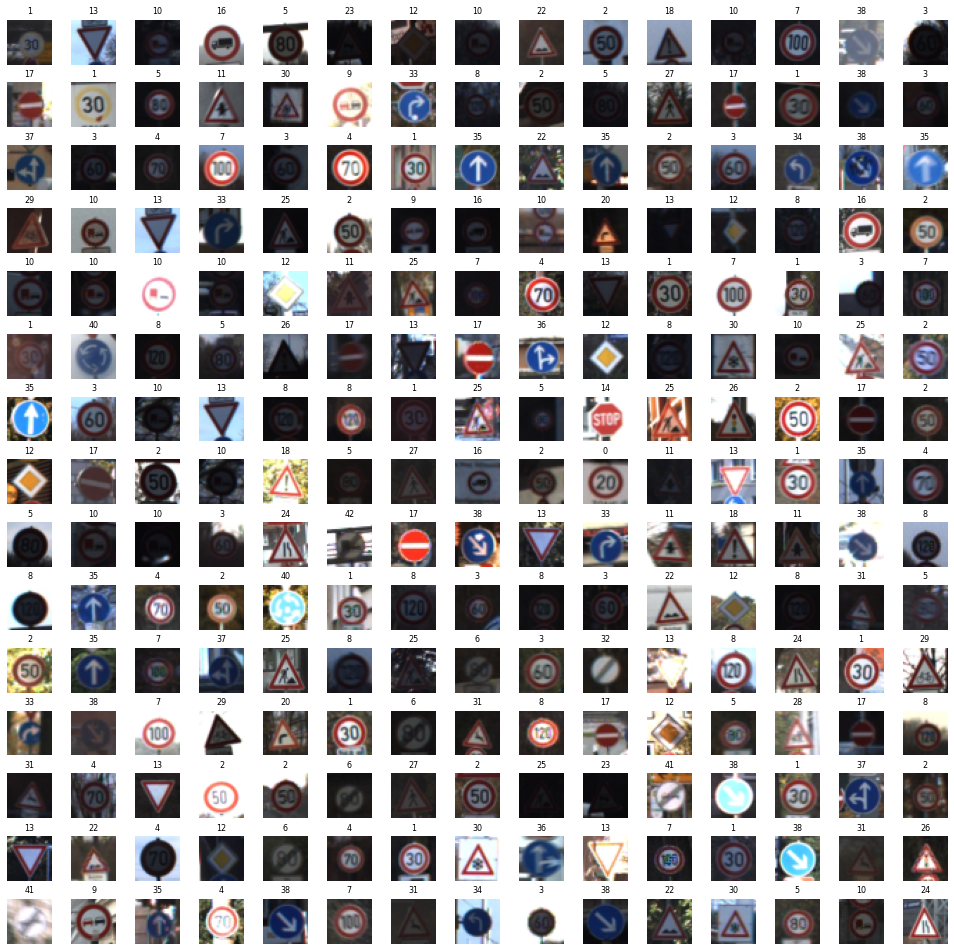

In [14]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #4: DATA PREPROCESSING

In [15]:
X_train = X_train / 255
X_test = X_test / 255

# STEP#4: BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [16]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) # Encoded image (Code Layer)


# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
X_train.shape

(34799, 32, 32, 3)

In [19]:
X_test.shape

(12630, 32, 32, 3)

In [20]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))


Epoch 1/20
174/174 [==============================] - 16s 36ms/step - loss: 0.5068 - val_loss: 0.5197
Epoch 2/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4895 - val_loss: 0.4903
Epoch 3/20
174/174 [==============================] - 5s 29ms/step - loss: 0.4851 - val_loss: 0.4840
Epoch 4/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4815 - val_loss: 0.4814
Epoch 5/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4792 - val_loss: 0.4793
Epoch 6/20
174/174 [==============================] - 5s 28ms/step - loss: 0.4771 - val_loss: 0.4745
Epoch 7/20
174/174 [==============================] - 5s 26ms/step - loss: 0.4758 - val_loss: 0.4734
Epoch 8/20
174/174 [==============================] - 5s 28ms/step - loss: 0.4745 - val_loss: 0.4763
Epoch 9/20
174/174 [==============================] - 5s 30ms/step - loss: 0.4736 - val_loss: 0.4731
Epoch 10/20
174/174 [==============================] - 5s 28ms/step - loss: 0.4727 - val_l

# STEP #5: EVALUATE THE MODEL

In [21]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 287ms/step


In [22]:
predicted.shape

(10, 32, 32, 3)

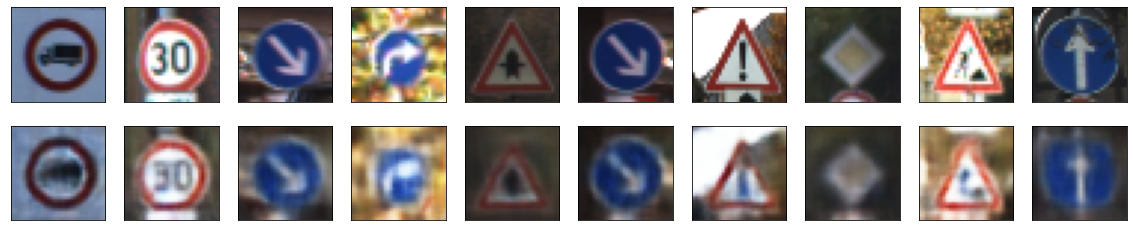

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)